In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# model selection
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn import tree
from IPython.display import Image


# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sb.set_style("whitegrid")
#sb.set(rc={'figure.figsize':(8,6)})
#sb.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
#sb.set_style("dark")

#statistical test
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

Modelling

    Split the datasets into train and test.

    Select important features based on co-relation matrix.

    Check for categorical variables and apply one hot encoding.

#### model- hdf

In [41]:
hdf = pd.read_csv('hour.csv', delimiter = ',') 

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


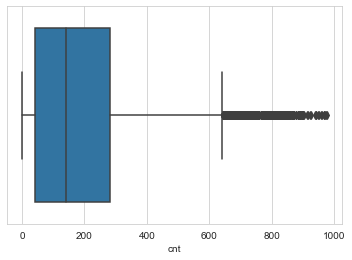

In [42]:
sb.boxplot(hdf.cnt);    
#maybe the outliers belong to summer time which is the right information if we remove the outliers belong there 
#we would miss some information. I have added the summer outliers to the removed outliers to not miss but the mean error became more 

In [43]:
q1 = hdf.cnt.quantile(0.25)          
q3 = hdf.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
hdf_quantile = hdf.loc[(hdf.cnt >= lower_bound) & (hdf.cnt<= upper_bound)]

In [44]:
upper_bound

642.5

In [45]:
hdf_quantile

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


C:\Users\Selin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


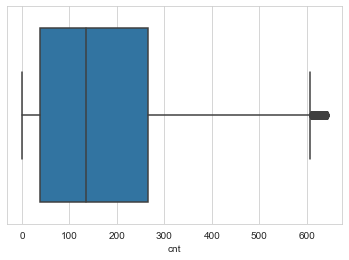

In [46]:
sb.boxplot(hdf_quantile.cnt);

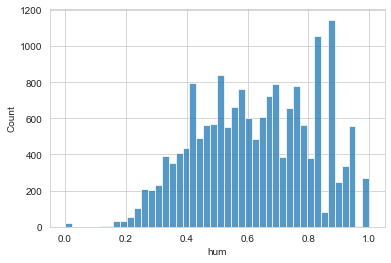

In [47]:
sb.histplot(hdf.hum); 

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


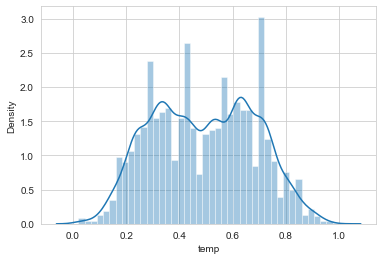

In [48]:
sb.distplot (hdf_quantile.temp); 

In [49]:
hdf_quantile["cnt"].max()

642

## modeling without outliers

In [50]:
hdf_quantile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     16874 non-null  int64  
 1   dteday      16874 non-null  object 
 2   season      16874 non-null  int64  
 3   yr          16874 non-null  int64  
 4   mnth        16874 non-null  int64  
 5   hr          16874 non-null  int64  
 6   holiday     16874 non-null  int64  
 7   weekday     16874 non-null  int64  
 8   workingday  16874 non-null  int64  
 9   weathersit  16874 non-null  int64  
 10  temp        16874 non-null  float64
 11  atemp       16874 non-null  float64
 12  hum         16874 non-null  float64
 13  windspeed   16874 non-null  float64
 14  casual      16874 non-null  int64  
 15  registered  16874 non-null  int64  
 16  cnt         16874 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
hdf_quantile['season'] = hdf_quantile['season'].astype('category')
hdf_quantile['yr'] = hdf_quantile['yr'].astype('category')
hdf_quantile['mnth'] = hdf_quantile['mnth'].astype('category')
hdf['weathersit'] =hdf['weathersit'].astype('category')
hdf_quantile.dtypes

<ipython-input-51-4bae2f2f63fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_quantile['season'] = hdf_quantile['season'].astype('category')
<ipython-input-51-4bae2f2f63fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf_quantile['yr'] = hdf_quantile['yr'].astype('category')
<ipython-input-51-4bae2f2f63fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [52]:
hdf_quantile_model= hdf_quantile[['season', 'yr', 'temp', 'cnt', 'mnth','hr', 'hum', 'weathersit']]

In [53]:
hdf_quantile_model= pd.get_dummies(hdf_quantile_model, columns=['season', 'yr', 'mnth', 'weathersit'])

In [54]:
X = hdf_quantile_model.drop(columns = ['cnt'])
y = hdf_quantile_model['cnt']

In [55]:
scaler = StandardScaler() # define object scaler of class Standard scaler
scaler.fit(X)
X = scaler.transform(X)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X

array([[-1.31281214, -1.64582059,  0.93246486, ..., -0.59793154,
        -0.3016088 , -0.01333491],
       [-1.41673542, -1.50218243,  0.88054227, ..., -0.59793154,
        -0.3016088 , -0.01333491],
       [-1.41673542, -1.35854427,  0.88054227, ..., -0.59793154,
        -0.3016088 , -0.01333491],
       ...,
       [-1.20888885,  1.37058079, -0.1579094 , ..., -0.59793154,
        -0.3016088 , -0.01333491],
       [-1.20888885,  1.51421895, -0.36559973, ..., -0.59793154,
        -0.3016088 , -0.01333491],
       [-1.20888885,  1.65785712,  0.10170352, ..., -0.59793154,
        -0.3016088 , -0.01333491]])

In [58]:
X = np.where(X<0, 0, X) 
X.min()

0.0

In [59]:
lr = LinearRegression()

#scores = cross_val_score(lr, X, y, cv=10, scoring= 'r2')

scores = - cross_val_score(lr, X, y, cv=10, scoring= 'neg_mean_absolute_error')

scores.mean()




102.04510765828105

In [60]:
rf = RandomForestRegressor()
#scores = cross_val_score(lr, X, y, cv=10, scoring= 'r2')
scores = - cross_val_score(rf, X, y, cv=10, scoring= 'neg_mean_absolute_error')
scores.mean()

86.68957753301336

In [61]:
len(cross_val_predict(rf, X, y, cv=4))

16874

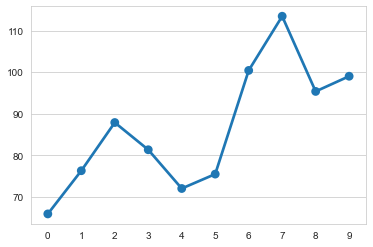

In [62]:
sb.pointplot(x = list(range(10)), y = scores );

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [64]:

X_train.shape


(13499, 25)

In [65]:

X_test.shape

(3375, 25)

In [66]:

from sklearn.linear_model import LinearRegression


In [67]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:

#sb.pointplot(x = y_test, y = y_pred)


In [69]:
X_train

array([[0.        , 0.        , 1.60745844, ..., 0.        , 3.31555315,
        0.        ],
       [2.01273308, 0.36511367, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.65785712, 1.60745844, ..., 0.        , 3.31555315,
        0.        ],
       ...,
       [1.59703993, 0.07783734, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10170352, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10170352, ..., 1.67243227, 0.        ,
        0.        ]])

In [70]:

#y_test[0:10]
y_test

16249    396
12489    593
7336     311
346       26
3707     202
        ... 
1368     110
9361      52
1253     114
4840      90
4153      78
Name: cnt, Length: 3375, dtype: int64

In [71]:
y_pred[0:10]

array([244.75 , 357.125,  49.   , 140.75 , 243.25 , 131.875, 344.75 ,
       -45.5  , 322.5  ,  94.75 ])

In [72]:
mean_absolute_error(y_test, y_pred)

97.78818518518518

In [73]:
rmse = mean_squared_error(y_test, y_pred)
rmse

15912.882486111112

In [74]:
rf = RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

73.941778268175

In [75]:
y_pred = np.where(y_pred<0, 0, y_pred) 
y_pred.min()

3.4714841449400278

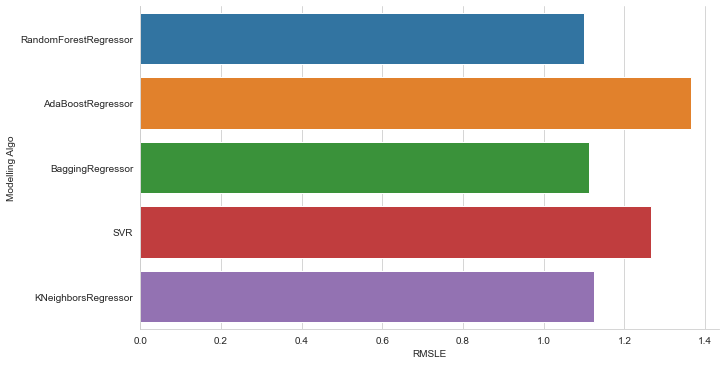

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(y_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(y_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}

d2={'Modelling Algo':model_names,'RMSE':rmse}

rmsle_frame=pd.DataFrame(d1)
#rmsle_frame

rmse_frame=pd.DataFrame(d2)
#rmse_frame

sb.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

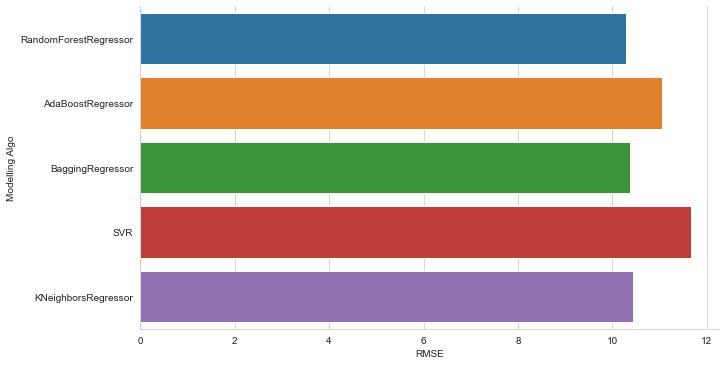

In [77]:
sb.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

## Random Forest Classification - Users 


In [190]:
hdf.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [191]:
hdf_merged = pd.melt(hdf, id_vars=['dteday', 'season', 'yr', 'mnth', "hr" ,'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'], value_vars=["casual", "registered"]).sort_values(by = "dteday").reset_index (drop = True)

In [224]:
X =  hdf_merged.drop(['dteday',"variable", "season", "holiday","weekday", "weathersit", "mnth", 'value'],  axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34758 entries, 0 to 34757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          34758 non-null  category
 1   hr          34758 non-null  int64   
 2   workingday  34758 non-null  int64   
 3   temp        34758 non-null  float64 
 4   atemp       34758 non-null  float64 
 5   hum         34758 non-null  float64 
 6   windspeed   34758 non-null  float64 
 7   cnt         34758 non-null  int64   
dtypes: category(1), float64(4), int64(3)
memory usage: 1.9 MB


In [225]:
X.shape

(34758, 8)

In [226]:
le = LabelEncoder()
hdf_merged['variable'] = le.fit_transform(hdf_merged['variable'])
hdf_merged['variable'].value_counts()

1    17379
0    17379
Name: variable, dtype: int64

In [227]:
y = hdf_merged['variable']
y

0        0
1        1
2        1
3        1
4        1
        ..
34753    0
34754    0
34755    0
34756    0
34757    1
Name: variable, Length: 34758, dtype: int64

In [228]:
hdf_merged["variable"].value_counts()

1    17379
0    17379
Name: variable, dtype: int64

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #random state here is to choose always the same numbers

In [230]:
from imblearn.under_sampling import RandomUnderSampler

In [231]:
rus = RandomUnderSampler(random_state = 1)
X_train, y_train = rus.fit_sample(X_train, y_train)

In [232]:
pd_y = pd.Series(y_train)
pd_y.value_counts()

1    13887
0    13887
Name: variable, dtype: int64

In [233]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
X_test

array([[-1.00245134, -1.08674037, -1.46923413, ...,  1.31041149,
        -0.82193166, -1.01643908],
       [-1.00245134, -0.65341096,  0.68062672, ..., -3.25063249,
         0.27236853, -0.83996001],
       [-1.00245134, -0.65341096,  0.68062672, ...,  0.6366209 ,
        -0.82193166, -0.5200917 ],
       ...,
       [-1.00245134,  0.93546356,  0.68062672, ...,  0.32564063,
        -0.82193166, -0.47045696],
       [-1.00245134,  0.50213415,  0.68062672, ..., -1.02194055,
         0.02873803, -0.07337906],
       [-1.00245134,  1.0799067 , -1.46923413, ..., -0.45181005,
        -0.82193166, -0.42633719]])

In [234]:
X_train.shape

(27774, 8)

In [235]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [236]:
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

0.10615650172612198
[[ 354 3106]
 [3108  384]]


In [237]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      3460
           1       0.11      0.11      0.11      3492

    accuracy                           0.11      6952
   macro avg       0.11      0.11      0.11      6952
weighted avg       0.11      0.11      0.11      6952



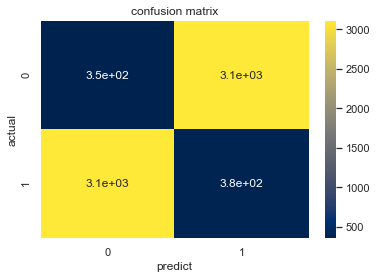

In [238]:
sb.set()
fig = plt.figure()
ax = fig.add_subplot(111)
conf_mat = confusion_matrix(y_test, pred_rfc)
sb.heatmap(conf_mat,annot=True, cmap='cividis') #cmap= magma,cividis
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('actual') #y轴
plt.show()

## Feature Importance Random Forest Classifier 

Feature: 0, Score: 0.02180
Feature: 1, Score: 0.14795
Feature: 2, Score: 0.01899
Feature: 3, Score: 0.11343
Feature: 4, Score: 0.11663
Feature: 5, Score: 0.16278
Feature: 6, Score: 0.14292
Feature: 7, Score: 0.27552


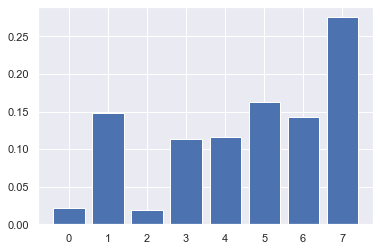

In [239]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

 0   yr          34758 non-null  category
 1   hr          34758 non-null  int64   
 2   workingday  34758 non-null  int64   
 3   temp        34758 non-null  float64 
 4   atemp       34758 non-null  float64 
 5   hum         34758 non-null  float64 
 6   windspeed   34758 non-null  int64
 7   cnt